In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from lime import lime_tabular
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from deap import base, creator, tools, algorithms
from datetime import datetime
from sklearn.svm import SVC
import warnings
import numpy as np
import random

In [25]:
df = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1]
y = pd.Series(y).apply(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
values = df.iloc[:, -1].values

# Calcula as estatísticas
print("Máximo =", np.max(values),
  "Mínimo =", np.min(values),
  "Média =", np.mean(values),
  "Mediana =", np.median(values),
  "Desvio Padrão =", np.std(values))

Máximo = 16 Mínimo = 1 Média = 3.8805309734513274 Mediana = 1.0 Desvio Padrão = 4.402219038329423


In [26]:
x_train

array([[44, 0, 168, ..., 2.1, 12.5, 30.9],
       [34, 0, 170, ..., 2.6, 44.0, 68.4],
       [57, 0, 170, ..., 2.3, 16.0, 38.0],
       ...,
       [75, 1, 159, ..., -3.7, 88.8, 43.7],
       [68, 0, 164, ..., 2.7, 18.8, 41.4],
       [36, 1, 160, ..., -0.5, 28.3, 24.1]], dtype=object)

In [27]:
encoder = OneHotEncoder()
encoder.fit(x_train)
encoded_train = encoder.transform(x_train)
rf = RandomForestClassifier()
rf.fit(encoded_train, y_train)

encoded_train

<361x13453 sparse matrix of type '<class 'numpy.float64'>'
	with 100719 stored elements in Compressed Sparse Row format>

In [28]:
df = pd.read_csv("resultados_AdaBoost_3.csv")
df.head(5)

,strategy,k,n_estimators,learning_rate,f1,elapsed_time
0,most_frequent,188,76,47,0.167646,1.730835
1,mean,198,96,14,0.004444,2.196143
2,mean,18,71,31,0.139788,0.711976
3,mean,53,61,95,0.113495,0.354872
4,most_frequent,148,96,21,0.091199,1.895108


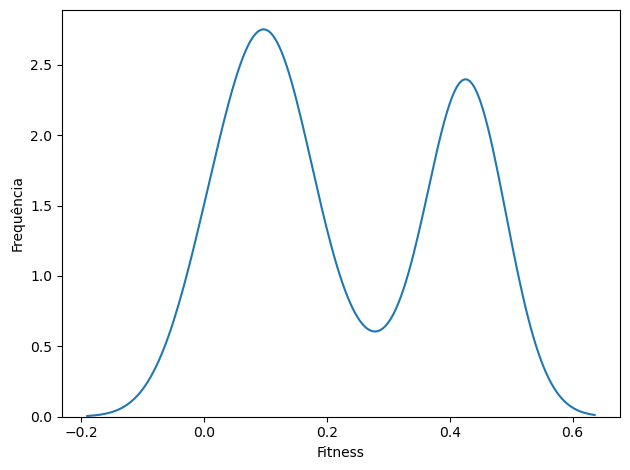

In [29]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

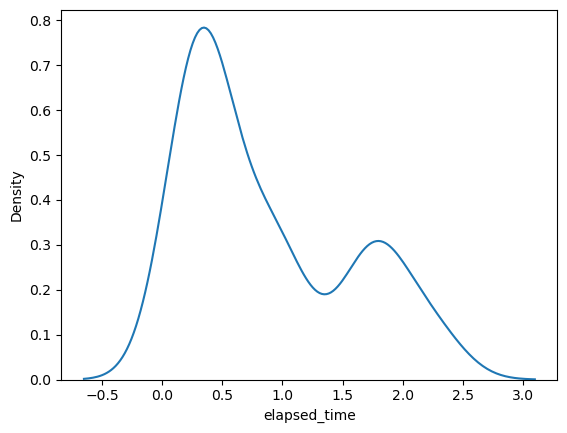

In [30]:
sns.kdeplot(df, x="elapsed_time")

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


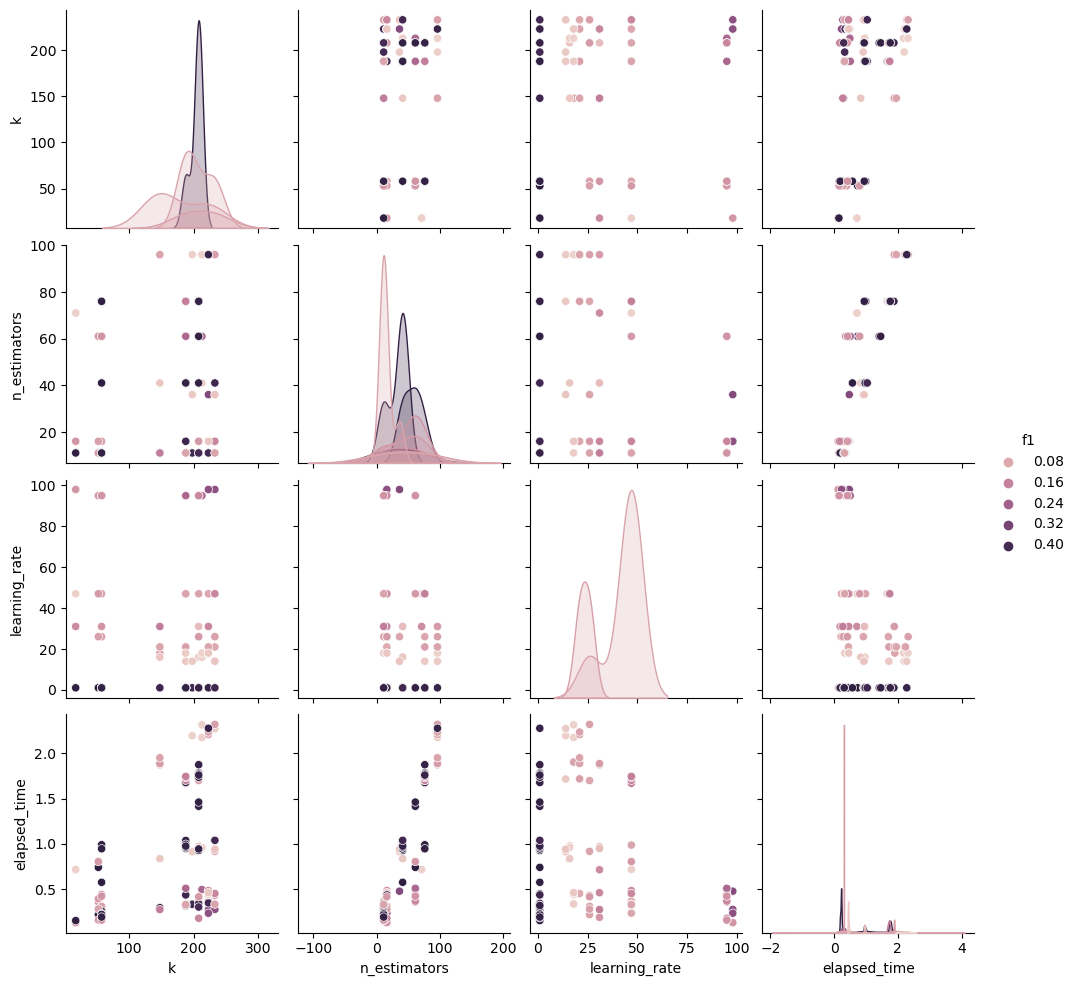

In [31]:
#df.f1.value_counts()

sns.pairplot( df, hue="f1" )

In [32]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

df.head(5)

,strategy,k,n_estimators,learning_rate,f1,elapsed_time
0,most_frequent,188,76,47,0.167646,1.730835
1,mean,198,96,14,0.004444,2.196143
2,mean,18,71,31,0.139788,0.711976
3,mean,53,61,95,0.113495,0.354872
4,most_frequent,148,96,21,0.091199,1.895108


In [33]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [34]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[ -20.239239 ,  -10.403519 ],
       [-110.53396  ,    1.5326949],
       [ -89.71864  ,   36.91002  ],
       [ -44.043526 ,   37.238155 ],
       [ -72.9501   ,  -51.22016  ],
       [ -48.30214  ,  -99.350845 ],
       [  63.274258 ,   38.705902 ],
       [ -68.76734  ,  -13.083992 ],
       [ -78.50857  ,   76.88312  ],
       [   8.990092 , -105.29004  ]], dtype=float32)

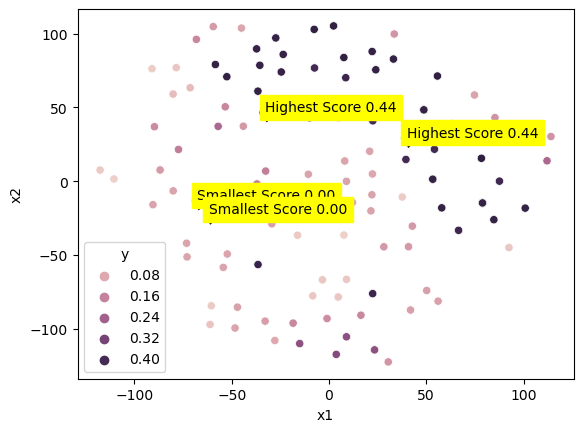

In [35]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [36]:
df.loc[df.f1 == df.f1.max()]

,strategy,k,n_estimators,learning_rate,f1,elapsed_time
17,most_frequent,53,11,1,0.444172,0.215895
24,mean,53,61,1,0.444172,0.738641


In [37]:
# Exibe os resultados
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Média da coluna 'f1': 0.2276479995445152
Média da coluna 'elapsed_time': 0.859165606557377


In [38]:
df_X = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
df_X.shape

(452, 280)

In [ ]:
RANDOM_STATE = 42

df_X = pd.read_csv("arrhythmia.csv", names=list(map(lambda X: f"col_{X}", range(280)))).replace("?", np.nan)
data = df_X.to_numpy()
X, y = data[:, :-1], data[:, -1]
X = X.astype(float)
y = pd.Series(y).astype(float)

preprocess = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent"))])

pipeline = pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('scaler', StandardScaler()),
        ('feature-selection', SelectKBest(k=53)),
        ('adaBoost', AdaBoostClassifier(
            n_estimators=11,
            learning_rate=1,
            random_state=RANDOM_STATE))])

pipeline.fit(X, y)
X = preprocess.fit_transform(X, y)
class_ = pipeline.classes_
y_pred = pipeline.predict(X)

explainer = LimeTabularExplainer(X,
                                 feature_names=df_X.columns[:-1],
                                 class_names=class_)

for i, (y, yp) in enumerate(zip(y, y_pred)):
    if y == yp:
        print(f"classe real: {y}, predição: {yp}")
        exp = explainer.explain_instance(X[i], pipeline.predict_proba)
        exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
#cria uma imagem 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

ax.plot_trisurf(Y, X, Z, cmap='viridis', linewidth=0.2)
ax.view_init(20, 75)

plt.show()

In [ ]:
#cria uma imagem 2D que mostre o Z evidente
fig = plt.figure()
ax = fig.add_subplot()

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

scatter = ax.scatter(X, Y, c=Z, cmap='viridis', linewidth=0.2)

#Definir os rótulos dos eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# Adicione uma barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Valores de Z')

plt.show()